In [53]:
import pandas as pd
import numpy as np

path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [54]:
#Importing matplotlib and  seaborn
import matplotlib.pyplot  as plt
%matplotlib inline

import seaborn as sns


In [55]:
#Seeing the  dimensions of data frame 
df.shape


(201, 29)

In [56]:
# the data types for each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [57]:
#Calculating the correlation between engine-size and price using corr function
df['engine-size'].corr(df['price']) 

0.8723351674455198

In [58]:
#Identifying variables with positive or negative correlation with price
df[df.columns[1:]].corr()['price'][:]

normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

In [59]:
#Identifying the  datatype of “peak-rpm”
df['peak-rpm'].dtype

dtype('float64')

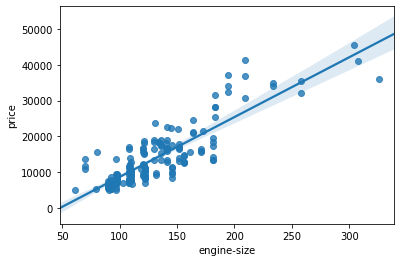

In [60]:
# Usinging  seaborn regplot() - ploting the  relation between “engine-size” and “price”. Comment on the observation.
plot1 = sns.regplot(x="engine-size", y="price", data=df)

# Observation:
# As the size of the engine increases the price also increases and both are in positive corelation with each other. 

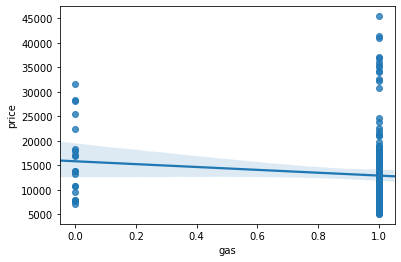

In [61]:
#Identifying using regplot() - which other variables can affect “price” and which do not affect it.
plot2 = sns.regplot(x="gas", y="price", data=df)

#Affect:
  #A)Normalized Losses
  #B)Wheel-base
  #C)Length
#Not Affect:
  #A)Gas


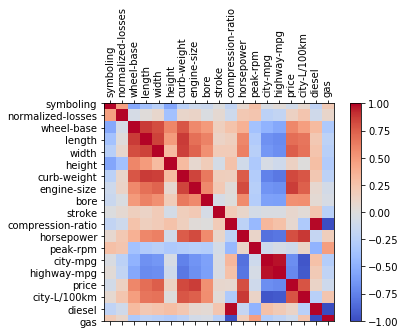

In [68]:
# heatmap to plot the correlation in the dataframe
corr = df.corr()
type(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

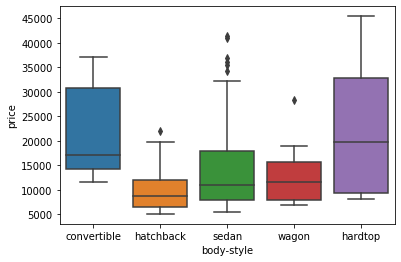

In [69]:
#With seaborn boxplot() - compare “body-style” with “price” 
plot5=sns.boxplot(x ='body-style', y ='price', data = df) 
  

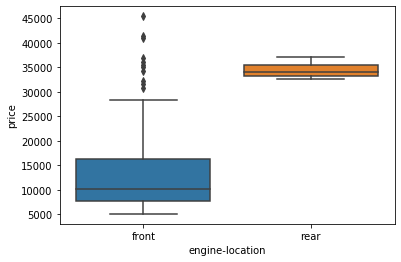

In [70]:
# Categorical variable engine-location in the dataset.
plot7=sns.boxplot(x ='engine-location', y ='price', data = df) 

In [71]:
# describe() to get descriptive statistics of numeric variables
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [72]:
#Use describe() to get stats of categorical variables
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [73]:
#Use groupby() to get the average price of “drive-wheels” wrt “price”. What do you understand by doing this?
grouped_test1 = df.groupby(['drive-wheels'])["price"].mean()
grouped_test1
"""
 The Drive wheels having the rwd type has the highest average cost and then the 4wd has the second higest price and than fwd type has the lowest type as compared to other types
"""

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [74]:
# Repeating step 17 for other categorical variables.
grouped_test2 = df.groupby(['drive-wheels','make','aspiration','num-of-doors','body-style','engine-location','engine-type','num-of-cylinders','fuel-system','horsepower-binned'])["price"].mean()
grouped_test2


drive-wheels  make    aspiration  num-of-doors  body-style  engine-location  engine-type  num-of-cylinders  fuel-system  horsepower-binned
4wd           audi    std         four          sedan       front            ohc          five              mpfi         Medium               17450.0
              subaru  std         four          sedan       front            ohcf         four              2bbl         Low                   9233.0
                                                wagon       front            ohcf         four              2bbl         Low                   8013.0
                                  two           hatchback   front            ohcf         four              2bbl         Low                   7603.0
                      turbo       four          sedan       front            ohcf         four              mpfi         Medium               11259.0
                                                                                                               

In [75]:
#Use groupby() to find the average price for “drive-wheels”and”body-style” with price. Observation? Inference?
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test3 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test3
"""
 Observation: The drive wheels type rwd and the body style hardtop has the highest average price and than  second highest is the drive whhels rwd ans the bodystyle convertible 
 Inference :It can be infered from the group by is that the drive-wheels type rwd and all the body style have the highest average as compared to other drive wheels type and the body style and the fwd drive-wheels type and the body-style
"""

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [76]:
# Use pivot() on the result of step 19 to get “drive-wheels” as index and “body-style” as columns. Observations? Inference?
grouped_pivot = grouped_test3.pivot(index='drive-wheels',columns='body-style')
grouped_pivot
# filling the NaN values with 0
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [77]:
# Repeat step 19and20 for other combinations of independent variables wrt price. Observations? Inferences?
df_gptest1 = df[['drive-wheels','body-style','price','wheel-base','length','width','curb-weight','engine-size','bore','horsepower']]
grouped_test4 = df_gptest1.groupby(['drive-wheels','body-style','wheel-base','length','width','curb-weight','engine-size','bore','horsepower'],as_index=False).mean()
grouped_test4
grouped_pivot1 = grouped_test4.pivot(index='price',columns='drive-wheels','body-style','wheel-base','length','width','curb-weight','engine-size','bore','horsepower')
grouped_pivot1
# filling the NaN values with 0
grouped_pivot1 = grouped_pivot1.fillna(0) #fill missing values with 0
grouped_pivot1

SyntaxError: positional argument follows keyword argument (<ipython-input-77-001de8478aea>, line 5)

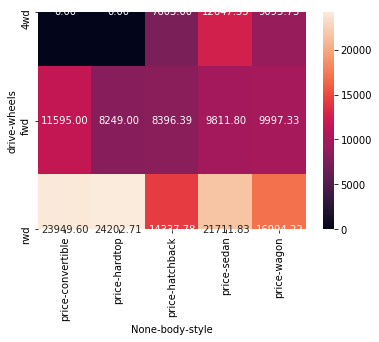

In [78]:
#Draw heatmap for result of step20
plot6 = sns.heatmap(grouped_pivot,annot=True,fmt='.2f')

In [79]:
#Calculate the pearson correlation between “wheel-base” and “price”. What can you conclude from p-value (Hint: use stats from scipy which has pearsonr())
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
"""
Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant.
Although the linear relationship isn't extremely strong (~0.585) and P-value is also less than 0.05 which tell's it is corelated

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


In [80]:
#Perform one way ANOVA test using f_oneway() of stats to check if different groups of “drive-wheels” are correlated with “price”. What do you understand from F-test and p-value results?

grouped_test5=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test5.head(2)
grouped_test5.get_group('4wd')['price']
f_val, p_val = stats.f_oneway(grouped_test5.get_group('fwd')['price'], grouped_test5.get_group('rwd')['price'], grouped_test5.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

"""
 The F-score is 67.95 which means the difference between the actual and the assumed mean is approximately 68 units away and the p-value is very significant with all the different categories of drive-wheels
"""


ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23
